In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [49]:
df = pd.read_csv("data.csv")

In [50]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [52]:
df = df.drop(columns=["id" , "Unnamed: 32"])

In [53]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [54]:
df["diagnosis"] = df["diagnosis"].map({"M":1 , "B":0})
df["diagnosis"].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [55]:
# Splitting features and labels
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Split into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
#  Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [57]:
# Fit Logistic Regression model
model = LogisticRegression()
model.fit(X_train_std, y_train)


LogisticRegression()

In [58]:
#  Predict probabilities
y_prob = model.predict_proba(X_test_std)[:, 1]

# Default threshold = 0.5
y_pred_05 = (y_prob >= 0.5).astype(int)


In [59]:
#  Evaluating at threshold 0.5
conf_matrix = confusion_matrix(y_test, y_pred_05)
precision = precision_score(y_test, y_pred_05)
recall = recall_score(y_test, y_pred_05)
roc_auc = roc_auc_score(y_test, y_prob)


In [60]:
print("Confusion Matrix:\n", conf_matrix)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"ROC-AUC Score: {roc_auc:.3f}")

Confusion Matrix:
 [[70  1]
 [ 2 41]]
Precision: 0.976
Recall: 0.953
ROC-AUC Score: 0.997


In [61]:
# Tuning Threshold to check how it change value of recall and precision (e.g., 0.3)
threshold = 0.3
y_pred_03 = (y_prob >= threshold).astype(int)
precision_03 = precision_score(y_test, y_pred_03)
recall_03 = recall_score(y_test, y_pred_03)
print(f"\nAt threshold = {threshold}:")
print(f"Precision: {precision_03:.3f}, Recall: {recall_03:.3f}")


At threshold = 0.3:
Precision: 0.913, Recall: 0.977


In [62]:
# Sigmoid function 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
sig = sigmoid(z)

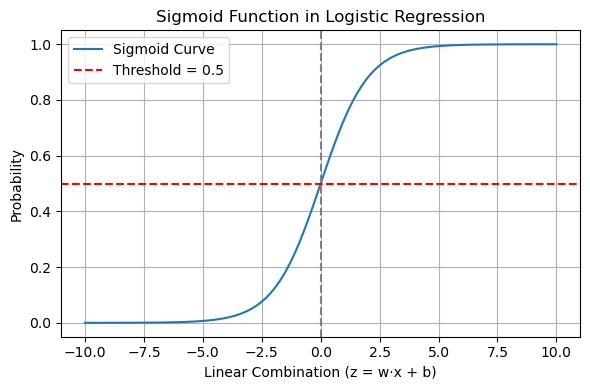

In [63]:
plt.figure(figsize=(6, 4))
plt.plot(z, sig, label="Sigmoid Curve")
plt.axvline(0, color='gray', linestyle='--')
plt.axhline(0.5, color='red', linestyle='--', label="Threshold = 0.5")
plt.title("Sigmoid Function in Logistic Regression")
plt.xlabel("Linear Combination (z = w·x + b)")
plt.ylabel("Probability")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
